In [1]:
import gzip
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Dense, Conv2D,Flatten



In [2]:
def open_images(filename):
    with gzip.open(filename, 'rb') as file:
        data = file.read()
        return np.frombuffer(data, dtype='uint8',offset=16)\
        .reshape(-1,28,28)\
        .astype(np.float32)

def open_labels(filename):
    with gzip.open(filename,'rb') as file:
        data = file.read()
        return np.frombuffer(data,  dtype='uint8', offset=8)


In [3]:
my_path = str.replace(r'C:\Users\Office\data\fashionmnist', '\\','/')
X_train = open_images('./data/fashionmnist/train-images-idx3-ubyte.gz')
y_train = open_labels('./data/fashionmnist/train-labels-idx1-ubyte.gz')

X_test = open_images('./data/fashionmnist/t10k-images-idx3-ubyte.gz')
y_test = open_labels('./data/fashionmnist/t10k-labels-idx1-ubyte.gz')

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [4]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(X_train.reshape(60000,28,28,1),
         y_train, 
         epochs=10,
         batch_size=1000
         )

Epoch 1/10
60/60 [==============================] - 4s 65ms/step - loss: 16.4368 - accuracy: 0.6919
Epoch 2/10
60/60 [==============================] - 4s 62ms/step - loss: 2.2030 - accuracy: 0.8118
Epoch 3/10
60/60 [==============================] - 4s 61ms/step - loss: 0.8950 - accuracy: 0.8403
Epoch 4/10
60/60 [==============================] - 4s 72ms/step - loss: 0.4777 - accuracy: 0.8623
Epoch 5/10
60/60 [==============================] - 5s 75ms/step - loss: 0.3496 - accuracy: 0.8834
Epoch 6/10
60/60 [==============================] - 5s 75ms/step - loss: 0.2880 - accuracy: 0.8994
Epoch 7/10
60/60 [==============================] - 5s 77ms/step - loss: 0.2507 - accuracy: 0.9102
Epoch 8/10
60/60 [==============================] - 4s 74ms/step - loss: 0.2281 - accuracy: 0.9149
Epoch 9/10
60/60 [==============================] - 5s 76ms/step - loss: 0.2087 - accuracy: 0.9237
Epoch 10/10
60/60 [==============================] - 4s 74ms/step - loss: 0.1940 - accuracy: 0.9281


In [6]:
model.layers

In [7]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 10) dtype=float32, numpy=
 array([[[[-1.22569226e-01, -2.40294665e-01,  6.28740340e-02,
           -1.04138441e-01,  1.22985400e-01, -1.48368850e-01,
           -1.50251180e-01, -5.18000238e-02,  5.40789329e-02,
           -2.60759205e-01]],
 
         [[-1.49549097e-01,  1.01606138e-01,  1.41611847e-04,
            7.91546181e-02, -1.87733900e-02, -9.70408693e-02,
           -2.11489841e-01,  2.17193412e-03, -1.38711661e-01,
           -1.30090117e-01]],
 
         [[-1.44568598e-02, -2.21200809e-01,  9.57074482e-03,
            5.63427135e-02, -1.86974540e-01, -4.60883602e-02,
           -8.50639790e-02,  9.07020569e-02,  8.58252272e-02,
           -1.12923622e-01]]],
 
 
        [[[ 1.54344961e-01, -6.29392341e-02, -9.08937603e-02,
           -1.18818149e-01, -5.47426865e-02, -1.61778495e-01,
           -1.59096003e-01, -1.34759143e-01,  2.58634631e-02,
           -3.90291288e-02]],
 
         [[ 2.76997909e-02, -3.12500447e-02, -2.153

In [8]:
# tensorflow Variable
# da das Modelauf der Graphikkarte ausgeführt werde könnten
model.layers[0].weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 10) dtype=float32, numpy=
array([[[[-1.22569226e-01, -2.40294665e-01,  6.28740340e-02,
          -1.04138441e-01,  1.22985400e-01, -1.48368850e-01,
          -1.50251180e-01, -5.18000238e-02,  5.40789329e-02,
          -2.60759205e-01]],

        [[-1.49549097e-01,  1.01606138e-01,  1.41611847e-04,
           7.91546181e-02, -1.87733900e-02, -9.70408693e-02,
          -2.11489841e-01,  2.17193412e-03, -1.38711661e-01,
          -1.30090117e-01]],

        [[-1.44568598e-02, -2.21200809e-01,  9.57074482e-03,
           5.63427135e-02, -1.86974540e-01, -4.60883602e-02,
          -8.50639790e-02,  9.07020569e-02,  8.58252272e-02,
          -1.12923622e-01]]],


       [[[ 1.54344961e-01, -6.29392341e-02, -9.08937603e-02,
          -1.18818149e-01, -5.47426865e-02, -1.61778495e-01,
          -1.59096003e-01, -1.34759143e-01,  2.58634631e-02,
          -3.90291288e-02]],

        [[ 2.76997909e-02, -3.12500447e-02, -2.15399012e-01,
           5

In [9]:
import keras.backend as K

# tensorflow Variable
# da das Modelauf der Graphikkarte ausgeführt werde könnten
# müssen wir diese erst auf die CPU ruterladen 

data = K.eval( model.layers[0].weights[0] )

# Zugriff auf die ersten Gewichte unserer Filter

data[:,:,:,0].reshape(3,3)


array([[-0.12256923, -0.1495491 , -0.01445686],
       [ 0.15434496,  0.02769979, -0.17212373],
       [-0.03313494, -0.15099642,  0.1301018 ]], dtype=float32)

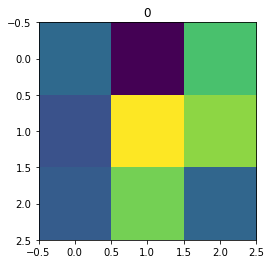

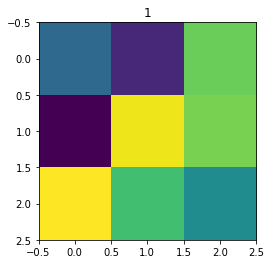

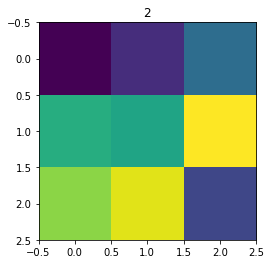

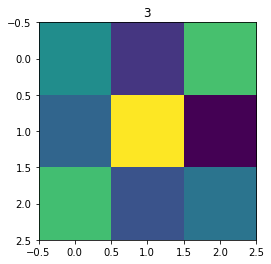

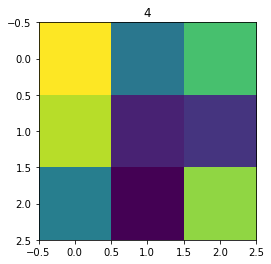

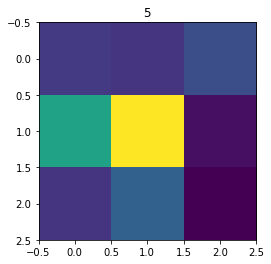

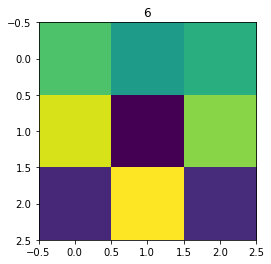

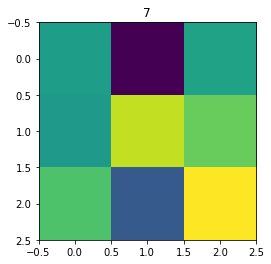

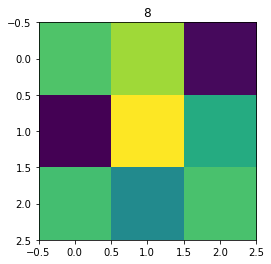

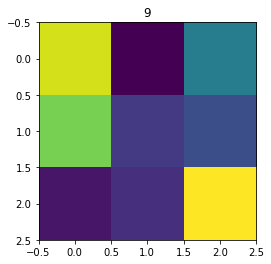

In [10]:
%matplotlib inline

for i in range(0,10):
    plt.imshow(data[:,:,:,i].reshape(3,3))
    plt.title(i)
    plt.show()

In [10]:
X_test[0].shape

(28, 28)

In [11]:
result = model.predict(X_test[0].reshape(1,28,28,1) )
print(result)

[[2.9040645e-11 5.1938922e-17 1.3722704e-10 2.9806057e-13 1.9180504e-10
  1.1562782e-05 1.3519683e-12 2.2040373e-05 1.4683773e-07 9.9996626e-01]]


In [12]:
result.shape

(1, 10)

In [13]:
model2 = Sequential()

model2.add(Conv2D(
    10,
    kernel_size=(3,3),
    activation ='relu',
    input_shape=(28,28,1),
    weights = model.layers[0].get_weights()
    )) 

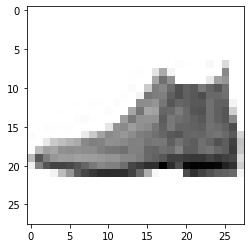

In [14]:
plt.imshow(X_test[0], cmap = 'gray_r')
plt.show()

In [15]:
result = model2.predict(X_test[0].reshape(1,28,28,1) )
result.shape
result[0].shape

(26, 26, 10)

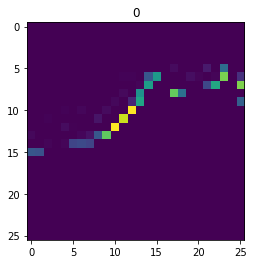

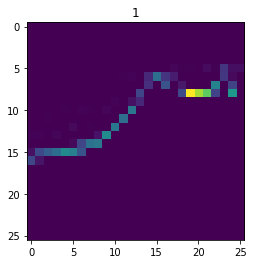

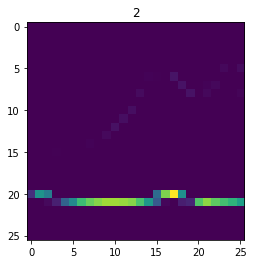

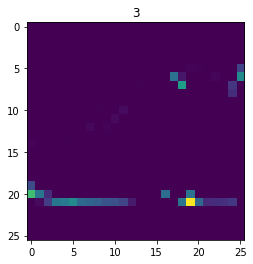

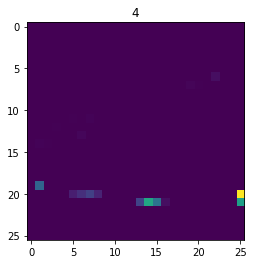

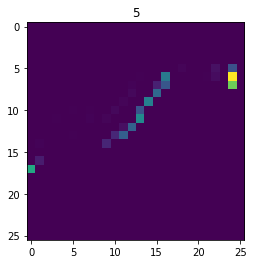

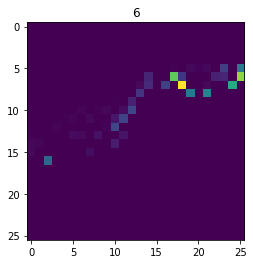

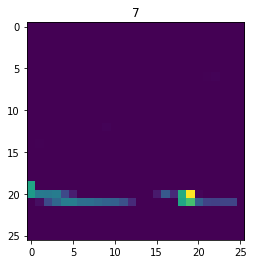

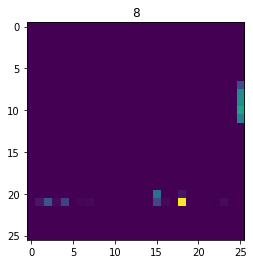

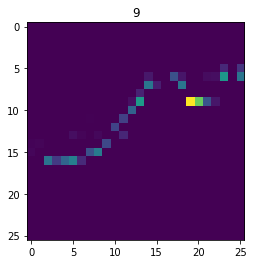

In [16]:
for i in range(0,10):
    plt.imshow(result[0][:,:,i])
    plt.title(i)
    plt.show()